In [1]:
from sweeping import Sweeper
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
sweeper = Sweeper.from_jsonfile("config.json")

In [3]:
sweeper.config_df

,dataset,attack,norm,model,binary_search_steps,loss_f,steps,α_final,α_init,γ_final,γ_init,num_steps
0,CIFAR10,alma,L2,Rade2021Helper_R18_ddpm,<NA>,DL,<NA>,<NA>,<NA>,<NA>,<NA>,500
1,CIFAR10,alma,L2,Rebuffi2021Fixing_R18_cutmix_ddpm,<NA>,DL,<NA>,<NA>,<NA>,<NA>,<NA>,500
2,CIFAR10,fmn,L2,Rade2021Helper_R18_ddpm,<NA>,DL,500,<NA>,<NA>,<NA>,<NA>,<NA>
3,CIFAR10,fmn,L2,Rebuffi2021Fixing_R18_cutmix_ddpm,<NA>,DL,500,<NA>,<NA>,<NA>,<NA>,<NA>
4,CIFAR10,fmn,Linf,Gowal2021Improving_R18_ddpm_100m,10,DL,100,<NA>,1,0.001,0.05,<NA>
5,CIFAR10,fmn,Linf,Rade2021Helper_R18_extra,10,DL,100,<NA>,1,0.001,0.05,<NA>


In [4]:
sweeper.sweep(n_samples=300, recompute=True)
sweeper.save_df()

dataset                      CIFAR10
attack                          alma
norm                              L2
model        Rade2021Helper_R18_ddpm
loss_f                            DL
num_steps                        500
Name: 0, dtype: object
Files already downloaded and verified


100%|██████████| 15/15 [1:29:06<00:00, 356.43s/it]


Done: 1/6
dataset                                CIFAR10
attack                                    alma
norm                                        L2
model        Rebuffi2021Fixing_R18_cutmix_ddpm
loss_f                                      DL
num_steps                                  500
Name: 1, dtype: object
Files already downloaded and verified


100%|██████████| 15/15 [1:20:26<00:00, 321.76s/it]


Done: 2/6
dataset                    CIFAR10
attack                         fmn
norm                            L2
model      Rade2021Helper_R18_ddpm
loss_f                          DL
steps                          500
Name: 2, dtype: object
Files already downloaded and verified


100%|██████████| 15/15 [1:20:48<00:00, 323.25s/it]


Done: 3/6
dataset                              CIFAR10
attack                                   fmn
norm                                      L2
model      Rebuffi2021Fixing_R18_cutmix_ddpm
loss_f                                    DL
steps                                    500
Name: 3, dtype: object
Files already downloaded and verified


100%|██████████| 15/15 [1:49:10<00:00, 436.67s/it]


Done: 4/6
dataset                                         CIFAR10
attack                                              fmn
norm                                               Linf
model                  Gowal2021Improving_R18_ddpm_100m
binary_search_steps                                  10
loss_f                                               DL
steps                                               100
α_init                                                1
γ_final                                           0.001
γ_init                                             0.05
Name: 4, dtype: object
Files already downloaded and verified


100%|██████████| 15/15 [19:02<00:00, 76.16s/it]


Done: 5/6
dataset                                 CIFAR10
attack                                      fmn
norm                                       Linf
model                  Rade2021Helper_R18_extra
binary_search_steps                          10
loss_f                                       DL
steps                                       100
α_init                                        1
γ_final                                   0.001
γ_init                                     0.05
Name: 5, dtype: object
Files already downloaded and verified


100%|██████████| 15/15 [17:28<00:00, 69.87s/it]

Done: 6/6


(500, 300)
(500, 300)
(500, 300)
(500, 300)


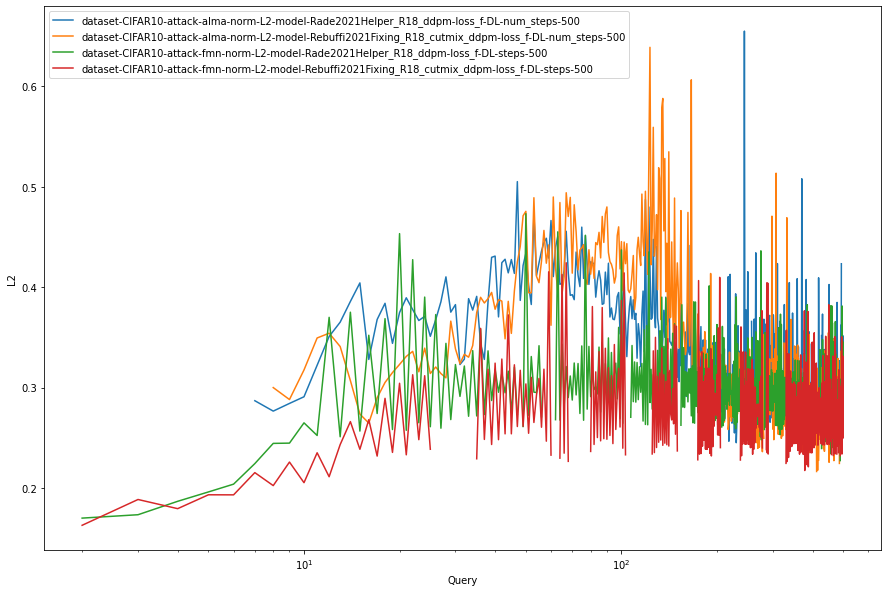

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for key in sweeper.logger.dict.keys():
    if "norm-L2" in key:
        sweeper.logger.plot_QD(key)
plt.legend([*sweeper.logger.dict.keys()])#, bbox_to_anchor =(0.65, 1.25))
plt.ylabel("L2")
plt.xlabel("Query")
plt.xscale('log')
None

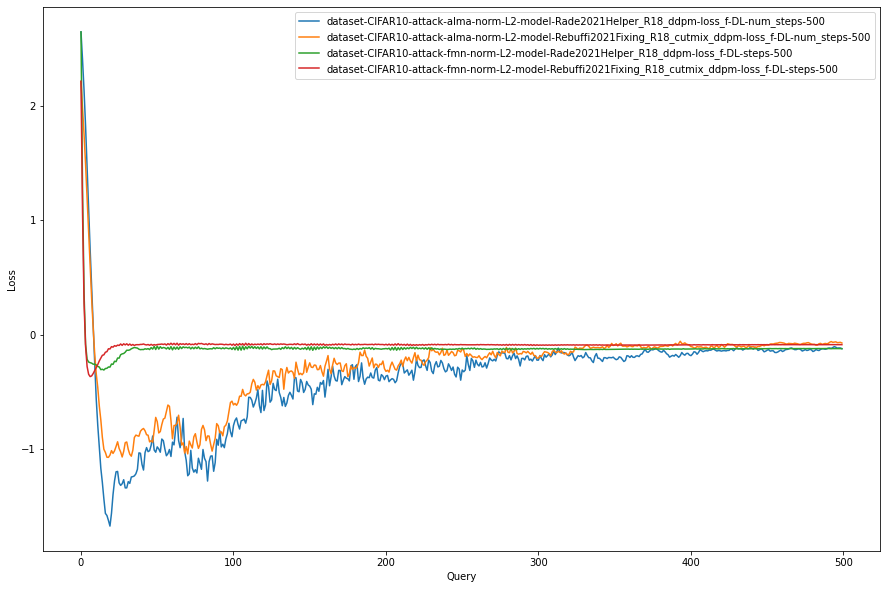

In [11]:
plt.figure(figsize=(15,10))
for key in sweeper.logger.dict.keys():
    if "norm-L2" in key:
        sweeper.logger.plot_progress(kind="loss", run_id=key)
plt.legend([*sweeper.logger.dict.keys()])#, bbox_to_anchor =(0.65, 1.25))
plt.ylabel("DL Loss")
plt.xlabel("Query")
None

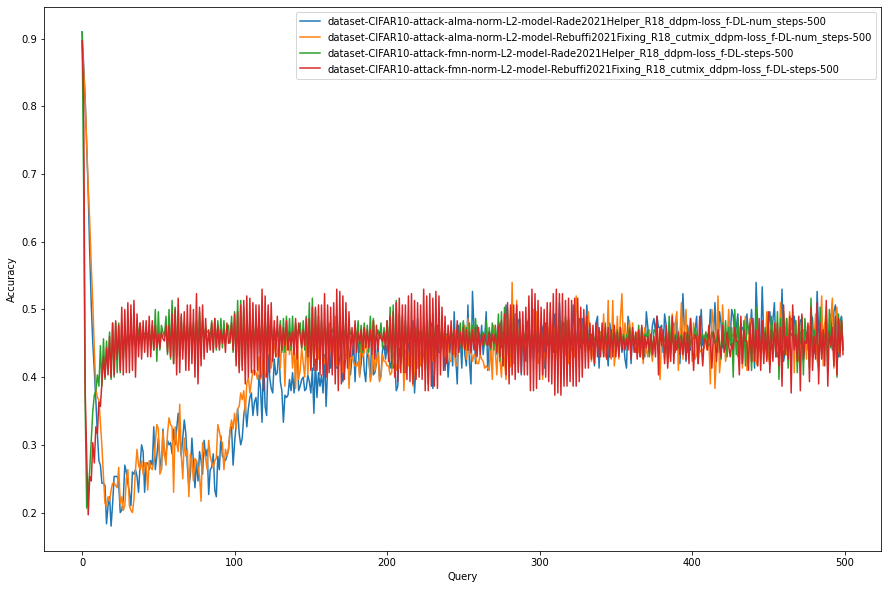

In [12]:
plt.figure(figsize=(15,10))
for key in sweeper.logger.dict.keys():
    if "norm-L2" in key:
        sweeper.logger.plot_progress(kind="acc", run_id=key)
plt.legend([*sweeper.logger.dict.keys()])#, bbox_to_anchor =(0.65, 1.25))
plt.ylabel("Accuracy")
plt.xlabel("Query")
None

In [29]:
sweeper_ = Sweeper.from_jsonfile("config.json")
sweeper_.sweep(n_samples=20, recompute=False, logs_dir="test")

dataset                      CIFAR10
attack                          alma
norm                              L2
model        Rade2021Helper_R18_ddpm
loss_f                            DL
num_steps                        500
Name: 0, dtype: object
Files already downloaded and verified


  0%|          | 0/1 [01:04<?, ?it/s]


KeyboardInterrupt: 